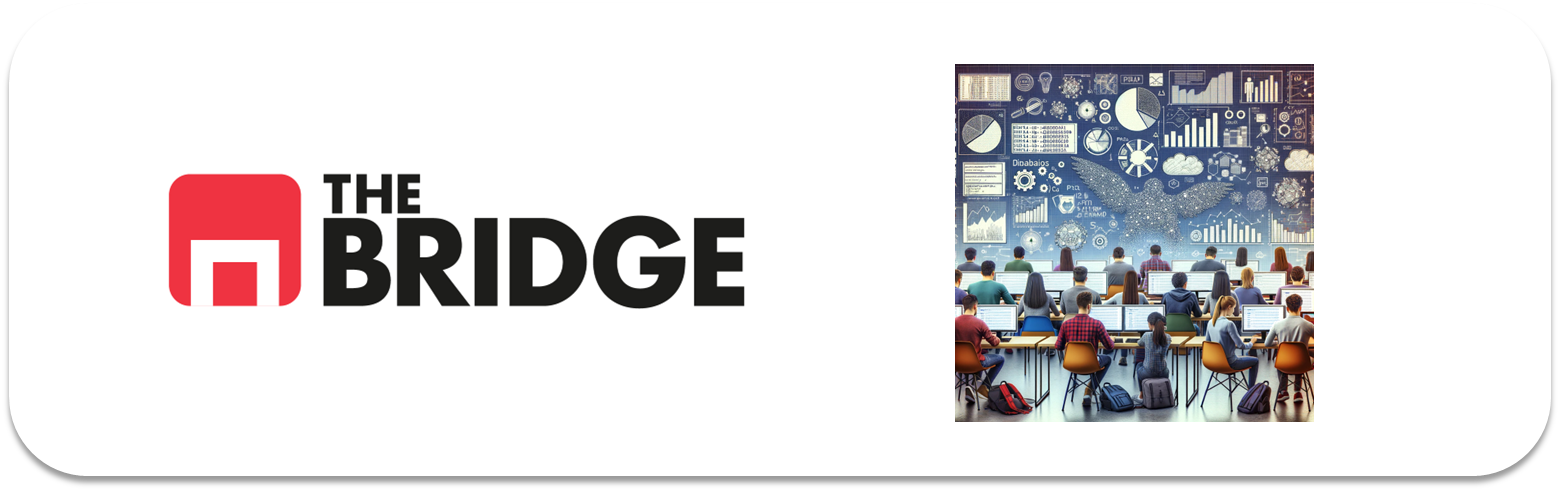

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,precision_score,recall_score,classification_report,roc_curve,auc
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



In [2]:
df_titanic = pd.read_csv('./data/titanic.csv')
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df_titanic.drop(columns=["alive","class","deck","embarked","sibsp","parch","sex"],inplace=True)

In [4]:
df_titanic.drop(columns=["adult_male"],inplace=True)

In [5]:
df_titanic

,survived,pclass,age,fare,who,embark_town,alone
0,0,3,22.0,7.2500,man,Southampton,False
1,1,1,38.0,71.2833,woman,Cherbourg,False
2,1,3,26.0,7.9250,woman,Southampton,True
3,1,1,35.0,53.1000,woman,Southampton,False
4,0,3,35.0,8.0500,man,Southampton,True
...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,man,Southampton,True
887,1,1,19.0,30.0000,woman,Southampton,True
888,0,3,NaN,23.4500,woman,Southampton,False
889,1,1,26.0,30.0000,man,Cherbourg,True


In [6]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   age          714 non-null    float64
 3   fare         891 non-null    float64
 4   who          891 non-null    object 
 5   embark_town  889 non-null    object 
 6   alone        891 non-null    bool   
dtypes: bool(1), float64(2), int64(2), object(2)
memory usage: 42.8+ KB


In [7]:
df_titanic["embark_town"].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

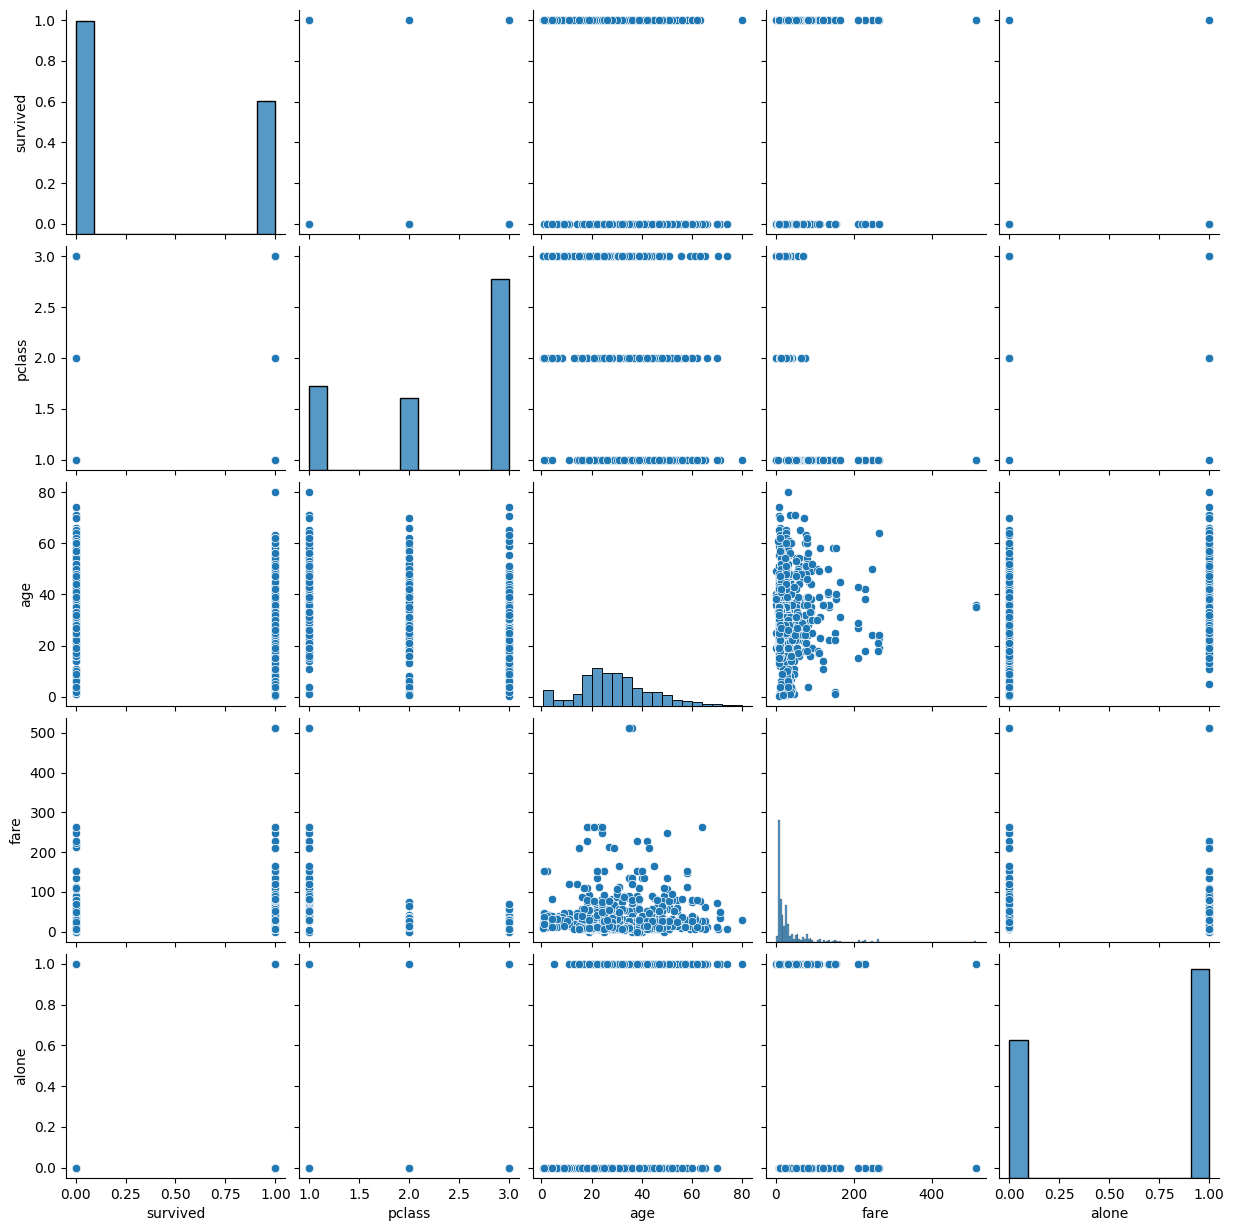

In [8]:
sns.pairplot(df_titanic)

<Axes: xlabel='survived', ylabel='count'>

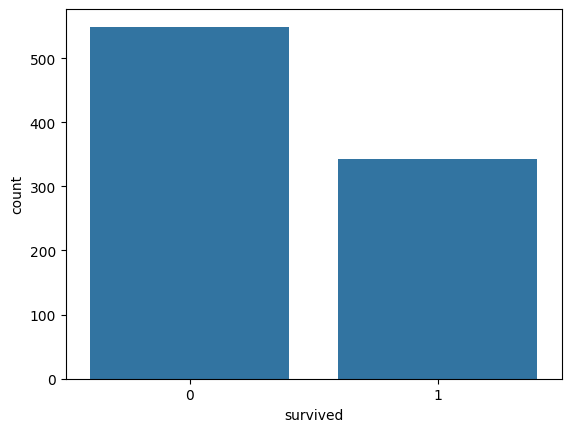

In [9]:
sns.countplot(x="survived",data=df_titanic)

In [10]:
target = "survived"

In [11]:
df_titanic.loc[df_titanic["embark_town"].isna(),"embark_town"] = "Desconocido"

In [12]:
df_titanic["embark_town"].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Desconocido      2
Name: count, dtype: int64

In [13]:
X = df_titanic.drop(columns=target)
y = df_titanic[target]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=df_titanic["embark_town"],random_state=42)

In [14]:
X_train.loc[X_train["embark_town"] == "Desconocido","embark_town"] = "Southampton"
X_test.loc[X_test["embark_town"]== "Desconocido","embark_town"] = "Southampton"

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 503 to 575
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       712 non-null    int64  
 1   age          576 non-null    float64
 2   fare         712 non-null    float64
 3   who          712 non-null    object 
 4   embark_town  712 non-null    object 
 5   alone        712 non-null    bool   
dtypes: bool(1), float64(2), int64(1), object(2)
memory usage: 34.1+ KB


In [16]:
X_train["who"].value_counts(dropna=False)

who
man      430
woman    221
child     61
Name: count, dtype: int64

In [17]:
X_train.loc[X_train["age"].isna()]

,pclass,age,fare,who,embark_town,alone
475,1,NaN,52.0000,man,Southampton,True
739,3,NaN,7.8958,man,Southampton,True
783,3,NaN,23.4500,man,Southampton,False
64,1,NaN,27.7208,man,Cherbourg,True
451,3,NaN,19.9667,man,Southampton,False
...,...,...,...,...,...,...
697,3,NaN,7.7333,woman,Queenstown,True
42,3,NaN,7.8958,man,Cherbourg,True
464,3,NaN,8.0500,man,Southampton,True
264,3,NaN,7.7500,woman,Queenstown,True


In [18]:
for i in X_train["who"].unique():
    X_train.loc[(X_train["who"] == i) & (X_train["age"].isna()),"age"] = X_train.loc[(X_train["who"] == i),"age"].median()

In [19]:
for i in X_test["who"].unique():
    X_test.loc[(X_test["who"] == i) & (X_test["age"].isna()),"age"] = X_train.loc[(X_train["who"] == i),"age"].median()

In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 503 to 575
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       712 non-null    int64  
 1   age          712 non-null    float64
 2   fare         712 non-null    float64
 3   who          712 non-null    object 
 4   embark_town  712 non-null    object 
 5   alone        712 non-null    bool   
dtypes: bool(1), float64(2), int64(1), object(2)
memory usage: 34.1+ KB


In [25]:
X_train["fare"] = X_train["fare"].apply(np.log)
X_test["fare"] = X_test["fare"].apply(np.log)

<Axes: xlabel='who', ylabel='Count'>

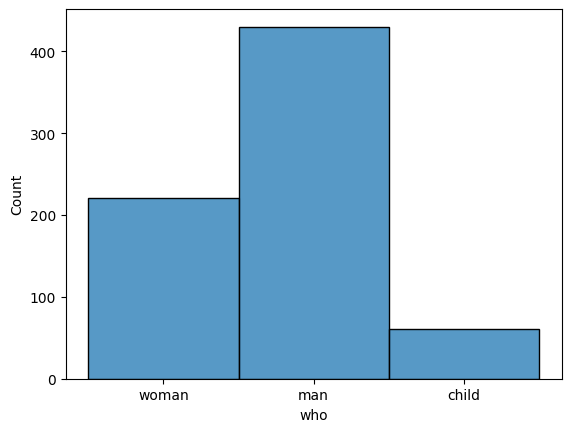

In [27]:
sns.histplot(X_train["who"])

In [29]:
clases_who = {
    "man":0,
    "woman":1,
    "child":2
}

In [31]:
X_train["who"] = X_train["who"].map(clases_who)

In [33]:
X_test["who"] = X_test["who"].map(clases_who)

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 503 to 575
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       712 non-null    int64  
 1   age          712 non-null    float64
 2   fare         712 non-null    float64
 3   who          712 non-null    int64  
 4   embark_town  712 non-null    object 
 5   alone        712 non-null    bool   
dtypes: bool(1), float64(2), int64(2), object(1)
memory usage: 34.1+ KB


In [35]:
X_train["embark_town"].unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [36]:
clases_embark_town = {
    "Southampton":0,
    "Cherbourg":1,
    "Queenstown":2
}

In [37]:
X_train["embark_town"] = X_train["embark_town"].map(clases_embark_town)
X_test["embark_town"] = X_test["embark_town"].map(clases_embark_town)

In [38]:
X_train["alone"].unique()

array([ True, False])

In [39]:
X_train["alone"] = X_train["alone"].astype(int)
X_test["alone"] = X_test["alone"].astype(int)

<Axes: >

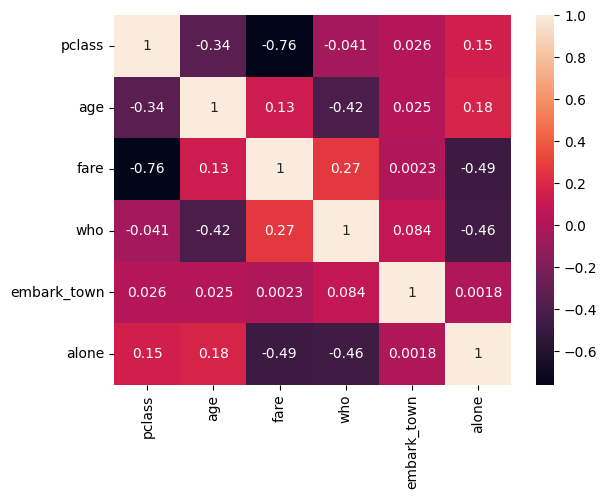

In [ ]:
matriz_correlaciones  = X_train.corr()
sns.heatmap(matriz_correlaciones,annot=True)

In [53]:
X_train["fare"] = X_train["fare"].replace([np.inf,-np.inf],0)
X_test["fare"] = X_test["fare"].replace([np.inf,-np.inf],0)

In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled,y_train)
y_pred_train = log_reg.predict(X_train_scaled)
y_pred_test = log_reg.predict(X_test_scaled)
print("Precisión en el conjunto de entrenamiento:", log_reg.score(X_train_scaled, y_train))

Precisión en el conjunto de entrenamiento: 0.7935393258426966


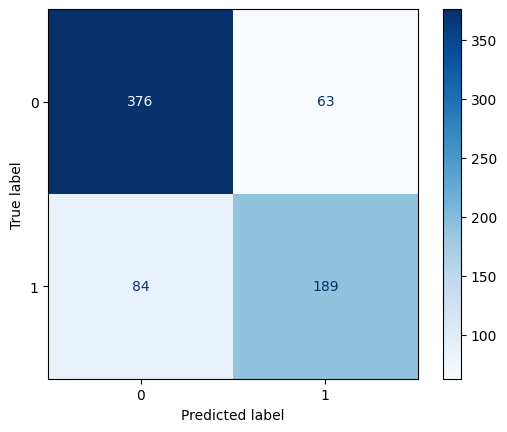

In [56]:
matrix_confusion = confusion_matrix(y_train, y_pred_train)
ConfusionMatrixDisplay(confusion_matrix=matrix_confusion, display_labels=log_reg.classes_).plot(cmap=plt.cm.Blues)

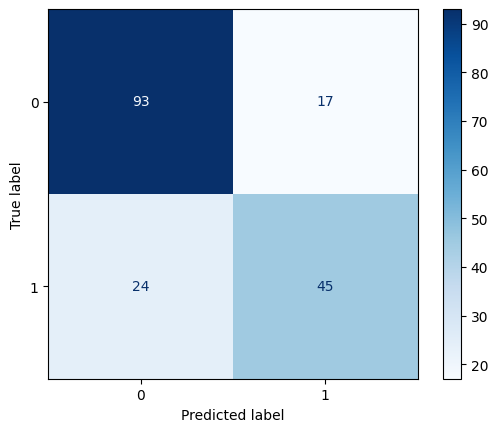

In [57]:
matrix_confusion = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(confusion_matrix=matrix_confusion, display_labels=log_reg.classes_).plot(cmap=plt.cm.Blues)

In [58]:
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       439
           1       0.75      0.69      0.72       273

    accuracy                           0.79       712
   macro avg       0.78      0.77      0.78       712
weighted avg       0.79      0.79      0.79       712

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       110
           1       0.73      0.65      0.69        69

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179

